## Import libraries
---

In [1]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib.pyplot as plt
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from dnn_app_utils import *

## Load pizza images
---

In [2]:
x, y = load_data()

973it [00:02, 328.49it/s]
525it [00:01, 396.38it/s]


In [4]:
train_x, test_x, train_y, test_y =  train_test_split(x, y, test_size=0.33, random_state=84)

## Define the neural-network architecture
---

In [5]:
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)

In [6]:
model = Sequential()

#The first hidden layer will have 1024 nodes and the input layer 3072.
model.add(Dense(1024, input_shape=(32*32*3,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

## Creating the model
---

In [7]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 80

# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [8]:
train_x.shape

(1003, 3072)

In [9]:
train_y.shape

(1003, 2)

In [10]:
H = model.fit(x= train_x, y=train_y, validation_data=(test_x, test_y), epochs=EPOCHS, batch_size=32)

Epoch 1/80
32/32 [==============================] - 2s 58ms/step - loss: 0.6607 - accuracy: 0.6520 - val_loss: 0.7030 - val_accuracy: 0.6263
Epoch 2/80
32/32 [==============================] - 1s 21ms/step - loss: 0.6731 - accuracy: 0.6388 - val_loss: 0.7824 - val_accuracy: 0.6263
Epoch 3/80
32/32 [==============================] - 1s 21ms/step - loss: 0.6558 - accuracy: 0.6549 - val_loss: 0.6546 - val_accuracy: 0.6263
Epoch 4/80
32/32 [==============================] - 1s 21ms/step - loss: 0.6303 - accuracy: 0.6744 - val_loss: 0.6648 - val_accuracy: 0.6263
Epoch 5/80
32/32 [==============================] - 1s 20ms/step - loss: 0.6463 - accuracy: 0.6556 - val_loss: 0.6546 - val_accuracy: 0.6263
Epoch 6/80
32/32 [==============================] - 1s 21ms/step - loss: 0.6436 - accuracy: 0.6479 - val_loss: 0.6633 - val_accuracy: 0.6263
Epoch 7/80
32/32 [==============================] - 1s 20ms/step - loss: 0.6402 - accuracy: 0.6501 - val_loss: 0.6842 - val_accuracy: 0.5576
Epoch 8/80
32

[INFO] evaluating network...


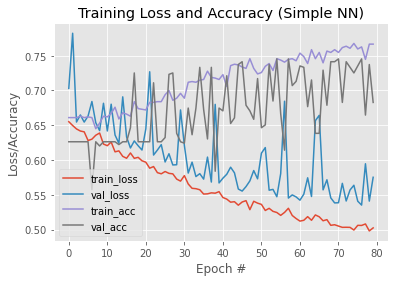

In [13]:
print("[INFO] evaluating network...")
predictions = model.predict(x=test_x, batch_size=32)

# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()